### Import Libraries

In [35]:
import cv2
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Prepare Data

In [2]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

### Train model

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = DecisionTreeClassifier()
    # dt = DecisionTreeClassifer(criterion='entropy')  if you eant entropy instead of gini
    dt.fit(X_train, y_train)
    dt_accuracy_scores.append(dt.score(X_test, y_test))
    dt_y_pred = dt.predict(X_test)
    dt_precision_scores.append(precision_score(y_test, dt_y_pred))
    dt_recall_scores.append(recall_score(y_test, dt_y_pred))
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_accuracy_scores.append(lr.score(X_test, y_test))
    lr_y_pred = lr.predict(X_test)
    lr_precision_scores.append(precision_score(y_test, lr_y_pred))
    lr_recall_scores.append(recall_score(y_test, lr_y_pred))

### Predict

In [11]:
print(model.predict([[3, True, 22, 1, 0, 7.25]]))

[0]


### Metrics

In [12]:
print("Decision Tree")
print("  accuracy:", np.mean(dt_accuracy_scores))
print("  precision:", np.mean(dt_precision_scores))
print("  recall:", np.mean(dt_recall_scores))
print("Logistic Regression")
print("  accuracy:", np.mean(lr_accuracy_scores))
print("  precision:", np.mean(lr_precision_scores))
print("  recall:", np.mean(lr_recall_scores))

Decision Tree
  accuracy: 0.7801244207452549
  precision: 0.7137563912041525
  recall: 0.7174203859865624
Logistic Regression
  accuracy: 0.7970354853043865
  precision: 0.7618898922983288
  recall: 0.6900529617441382


### Compare gini vs entropy

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n')
    print()


Decision Tree - gini
accuracy: 0.7745191392115787
precision: 0.7057459685305796
recall: 0.715051247771836 


Decision Tree - entropy
accuracy: 0.7700057131974862
precision: 0.697376171188259
recall: 0.710150572466749 




We see very little difference in the performance of Gini vs Entropy. This is expected as they aren’t really very different functions. It’s rare to find a dataset where the choice would make a difference.

## Visualize Tree

In [29]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male']].values
y = df['Survived'].values
dt = DecisionTreeClassifier()
dt.fit(X, y)
FEATURE_NAMES = ['Pclass', 'male']
dot_file = export_graphviz(dt, 'tree.dot', feature_names=FEATURE_NAMES)


In [30]:
! dot -Tpng tree.dot -o tree.png

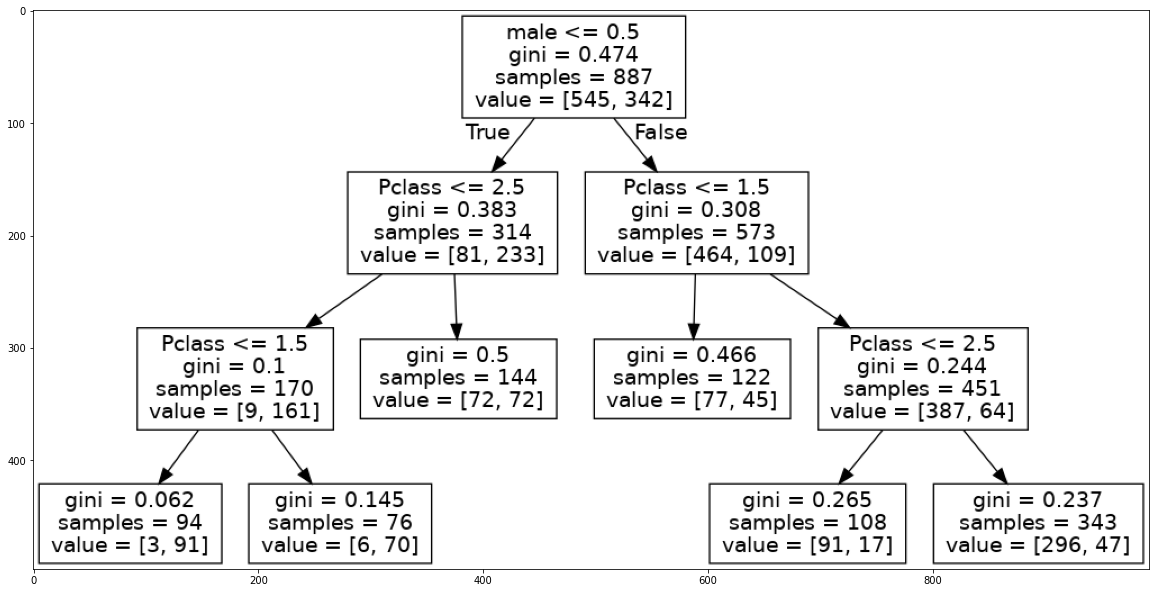

In [33]:
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

### Pre-pruning Parameters

In [41]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)
kf = KFold(n_splits=5, shuffle=True, random_state=10)
dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt.fit(X_train, y_train)
    dt_accuracy_scores.append(dt.score(X_test, y_test))
    dt_y_pred = dt.predict(X_test)
    dt_precision_scores.append(precision_score(y_test, dt_y_pred))
    dt_recall_scores.append(recall_score(y_test, dt_y_pred))
print("Decision Tree")
print("  accuracy:", np.mean(dt_accuracy_scores))
print("  precision:", np.mean(dt_precision_scores))
print("  recall:", np.mean(dt_recall_scores))

Decision Tree
  accuracy: 0.8105440233606298
  precision: 0.7861726182749033
  recall: 0.698493846839435


We’re not going to be able to intuit best values for the pre-pruning parameters. In order to decide on which to use, we use cross validation and compare metrics. We could loop through our different options like we did in the Lesson on Decision Trees in Scikit-learn, but scikit-learn has a grid search class built in that will do this for us.   

GridSearchCV has four parameters that we’ll use:
1. The model (in this case a DecisionTreeClassifier)
2. Param grid: a dictionary of the parameters names and all the possible values
3. What metric to use (default is accuracy)
4. How many folds for k-fold cross validation 

#### Hyperparameters

In [42]:
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]
}

In [44]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'max_depth': 25, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}
